In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dpl-project/model93.pt
/kaggle/input/dpl-project/features_labels_balanced.npy
/kaggle/input/dpl-project/model_update1.pt
/kaggle/input/dpl-project/test_data/raw_datas/neutral/chien_05.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/Xuyen_03.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/Xuyen_10.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/tinh_14.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/chien_09.mp3
/kaggle/input/dpl-project/test_data/raw_datas/neutral/Xuyen_14.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/tinh_7.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/tinh_9.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/tinh_8.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/Xuyen_12.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/Xuyen_01.m4a
/kaggle/input/dpl-project/test_data/raw_datas/neutral/chien_08.mp3
/kaggle/input/dpl-project/test_data/raw_datas/neutral/chien_06.m4a
/

In [2]:
df = pd.read_csv('/kaggle/input/data-csv/processed_shape_noise_data_new.csv')

In [3]:
pip install skimpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 32.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 11.0.0
    Uninstalling pyarrow-11.0.0:
      Successfully uninstalled pyarrow-11.0.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.13.3
    Uninstalling typeguard-2.13.3:
      Successfully uninstalled typeguard-2.13.3
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fo

In [4]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11501  │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 0.1      │    0 │      0 │   5800 │   3300 │     0 │   2900 │   5800 │   8600 │   12000 │ ▇▇▇▇▇▇  │  │
│ │ Unnamed: 0        │    0 │      0 │   3800 │   2200 │     0 │   1900 │   3800 │   5700 │    7500 │ ▇▇▇▇▇▇  │  │
│ │ positive          │    0 │      0 │    0.3 │   0.46 │     0 │      0 │      0 │      1 │       1 │ ▇    ▃  │  │
│ │ neutral           │    0 │      0 │   0.31 │   0.46 │     0 │      0 │      0 │      1 │       1 │ ▇    ▃  │  │
│ │ negative          │    0 │      0 │   0.39 │   0.49 │     0 │      0 │      0 │      1 │       1 │ ▇    ▅  │  │
│ │ time_shape        │    0 │      0 │    900 │      0 │   900 │    900 │    900 │    900 │     900 │     ▇   │  │
│ └───────────────────┴──────┴────────┴────────┴────────┴───────┴────────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sessionID                 │       0 │          0 │                            1 │                    11501 │  │
│ │ labels                    │       0 │          0 │                            1 │                    11501 │  │
│ │ dims                      │       0 │          0 │                            2 │                    23002 │  │
│ │ path                      │       0 │          0 │                            1 │                    11501 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
!pip install torchsummary

In [6]:
from torch import nn
import torch, torchvision, os
from torchsummary import summary
import numpy as np

In [7]:
# Xác định thiết bị, sử dụng GPU nếu có hoặc sử dụng CPU nếu không
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Tiếp theo, bạn có thể sử dụng biến 'device' trong mã của bạn


In [8]:
X_train = torch.load('/kaggle/input/data-noise-new/data_train_new.pt')
X_test = torch.load('/kaggle/input/data-noise-new/data_valid_new.pt')
Y_train = torch.load('/kaggle/input/data-noise-new/label_train_new.pt')
Y_test = torch.load('/kaggle/input/data-noise-new/label_valid_new.pt')

In [9]:
print(f'X_train:{X_train.shape}, y_train:{Y_train.shape}')
print(f'X_test:{X_test.shape}, y_test:{Y_test.shape}')

X_train:torch.Size([9200, 2, 40, 900]), y_train:torch.Size([9200, 3])
X_test:torch.Size([2301, 2, 40, 900]), y_test:torch.Size([2301, 3])


In [10]:
labels = ['positive', 'neutral', 'negative']
for ind, label in enumerate(labels):
    total = np.concatenate((Y_train[:,ind], Y_test[:,ind])).sum()
    print('Total sample of',label,'=',total)

Total sample of positive = 3486
Total sample of neutral = 3557
Total sample of negative = 4458


In [11]:
# Model flow
class define_model(nn.Module):

    # Define layers
    def __init__(self, num_emotions):
        super().__init__()

        transformer_layer = nn.TransformerEncoderLayer(
            d_model=40, #####################
            nhead=4,
            dim_feedforward=512,
            dropout=0.3,
            activation='relu'
        )
        self.transformer_maxpool = nn.MaxPool2d(kernel_size=[1,4], stride=[1,4])
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=4)

        #maxpool: reshape (width, height)
        #conv: reshape (channel)
        conv2d_layer = nn.Sequential(
            nn.Conv2d(
                in_channels=2,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(16),#######
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(32),#######
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.2),
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(64),#######
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.2),
        )
        self.conv2Dblock1 = nn.Sequential(
            nn.Conv2d(
                in_channels=2,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.2),
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.2),
        )
        self.conv2Dblock2 = conv2d_layer

        self.fc1_layer = nn.Linear(1792*2+40, 1800)
        self.act1 = nn.ReLU()
        self.fc2_layer = nn.Linear(1800, num_emotions)
        self.softmax_out = nn.Softmax(dim=1)

    def forward(self, x):
        conv2d_embedding1 = self.conv2Dblock1(x)
        conv2d_embedding1 = torch.flatten(conv2d_embedding1, start_dim = 1)

        conv2d_embedding2 = self.conv2Dblock2(x)
        conv2d_embedding2 = torch.flatten(conv2d_embedding2, start_dim = 1)

        x_maxpool = self.transformer_maxpool(x)
        # x_maxpool_reduced = torch.squeeze(x_maxpool,1)
        x_maxpool_reduced = x_maxpool.resize(x_maxpool.shape[0], 40, 450)
        x = x_maxpool_reduced.permute(2,0,1) #rearrange dims
        transformer_output = self.transformer_encoder(x)
        transformer_embedding = torch.mean(transformer_output, dim = 0)

        complete_embedding = torch.cat([conv2d_embedding1, conv2d_embedding2, transformer_embedding], dim = 1)
        fc1 = self.fc1_layer(complete_embedding)
        ac1 = self.act1(fc1)
        output_logits = self.fc2_layer(ac1)
        output_softmax = self.softmax_out(output_logits)
        return output_logits, output_softmax

In [12]:
def distribute_model(model):
    if torch.cuda.device_count() < 2:
        raise ValueError("At least 2 GPUs are required for this operation.")
    model = nn.DataParallel(model)
    return model

In [13]:
# Training step
def make_train_step(model, criterion, optimizer):
    def train_step(X, Y):
        output_logits, output_softmax = model(X)
        predictions = torch.argmax(output_softmax, dim=1)
        Y = torch.argmax(Y, dim=1)
        accuracy = torch.sum(Y==predictions)/float(len(Y))
        loss = criterion(output_logits, Y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item(), accuracy*100
    return train_step

#validation step
def make_validate_fnc(model, criterion):
    def validate(X,Y):
        with torch.no_grad():
            model.eval()
            output_logits, output_softmax = model(X)
            predictions = torch.argmax(output_softmax, dim=1)
            Y = torch.argmax(Y, dim=1)
            accuracy = torch.sum(Y==predictions)/float(len(Y))
            loss = criterion(output_logits, Y)
        return loss.item(), accuracy*100
    return validate

In [14]:
def load_model(model_path):
    model = define_model(3)
    model.eval()
    model.load_state_dict(torch.load(model_path, map_location='cpu'))
#model.load_state_dict(torch.load(model_path))
    return model

In [15]:
def make_save_checkpoint():
    def save_checkpoint(optimizer, model, epoch, filename):
        checkpoint_dict = {
            'optimizer': optimizer.state_dict(),
            'model': model.state_dict(),
            'epoch': epoch
        }
        torch.save(checkpoint_dict, filename)
    return save_checkpoint

def load_checkpoint(optimizer, model, filename):
    checkpoint_dict = torch.load(filename)
    epoch = checkpoint_dict['epoch']
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    return epoch, model

In [16]:
emotions_dict ={
    '0':'positive',
    '1':'neutral',
    '2':'negative'}

# Define optimizer
def choose_optimizer(kind, learning_rate, w_decay, model):
  if kind == 'SGD':
    return torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=w_decay, momentum=0.3)
  if kind == 'ADAM':
    return torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=w_decay, eps = 1e-08)
# Define loss/ criterion
def criterion(predictions, targets):
    return nn.CrossEntropyLoss()(input=predictions, target=targets)

# Define the model and distribute it across the two GPUs
model = define_model(len(emotions_dict))
# model = distribute_model(model)
print('Number of trainable params: ', sum(p.numel() for p in model.parameters()))

optimizer = choose_optimizer('SGD',0.1,1e-3, model)
save_checkpoint = make_save_checkpoint()
train_step = make_train_step(model, criterion, optimizer)
validate = make_validate_fnc(model, criterion)

# Define your device
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device2 = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

model.to(device1)
print(f'GPU model 1: {torch.cuda.get_device_name(0)}')

# Train your model on multiple GPUs
# if torch.cuda.device_count() > 1:
#     print("Let's use", torch.cuda.device_count(), "GPUs!")
#     model = nn.DataParallel(model, device_ids=[0, 1])

train_losses = []
valid_losses = []

Number of trainable params:  6770659
GPU model 1: Tesla P100-PCIE-16GB


In [17]:
def train(optimizer, model, num_epochs, X_train, Y_train, X_valid, Y_valid, list_acc, list_loss):
    train_size = X_train.shape[0]
    minibatch = 16
    acc_max = 0
    for epoch in range(num_epochs):
        #set to train phase
        model.train()

        train_indices = np.random.permutation(train_size)
        X_train = X_train[train_indices,:,:,:]
        Y_train = Y_train[train_indices,:]

        epoch_acc = 0
        epoch_loss = 0
        num_iterations = int(train_size/minibatch)

        for i in range(num_iterations):
            batch_start = i*minibatch
            batch_end = min(batch_start + minibatch, train_size)
            actual_batch_size = batch_end - batch_start

            X = X_train[batch_start:batch_end,:,:,:]
            Y = Y_train[batch_start:batch_end,:]

            X_tensor = torch.tensor(X, device = device).float()
            Y_tensor = torch.tensor(Y, dtype = torch.long, device = device)

            loss, acc = train_step(X_tensor, Y_tensor)

            epoch_acc += acc * actual_batch_size / train_size
            epoch_loss += loss * actual_batch_size / train_size

        X_valid_tensor = torch.tensor(X_test, device = device).float()
        Y_valid_tensor = torch.tensor(Y_test, dtype = torch.long, device = device)
        valid_loss, valid_acc, = validate(X_valid_tensor,Y_valid_tensor)
        list_acc[0].append(epoch_acc.cpu().numpy())
        list_acc[1].append(valid_acc.cpu().numpy())
        list_loss[0].append(epoch_loss)
        list_loss[1].append(valid_loss)

        if acc_max > int(epoch_acc):
          continue
        acc_max = epoch_acc
        checkpoint_filename = 'cnn_transformerFINAL-{:03d}.pkl'.format(epoch)
        save_checkpoint(optimizer, model, epoch, checkpoint_filename)
        torch.save(model.state_dict(),'model'+str(epoch)+'.pt')

        print(f'\nEpoch {epoch} --- loss:{epoch_loss:.3f}, Epoch accuracy:{epoch_acc:.2f}%, Validation loss:{valid_loss:.3f}, Validation accuracy:{valid_acc:.3f}')

In [18]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:<enter-size-here>"

In [19]:
num_epochs = 100
list_acc = [[],[]]
list_loss = [[],[]]
train(optimizer, model, num_epochs, X_train, Y_train, X_test, Y_test, list_acc, list_loss)

/tmp/ipykernel_32/1042968568.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, device = device).float()
/tmp/ipykernel_32/1042968568.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_tensor = torch.tensor(Y, dtype = torch.long, device = device)
/opt/conda/lib/python3.10/site-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
/tmp/ipykernel_32/1042968568.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid_tensor = torch


Epoch 0 --- loss:1.711, Epoch accuracy:38.14%, Validation loss:1.086, Validation accuracy:38.157

Epoch 1 --- loss:1.084, Epoch accuracy:39.36%, Validation loss:1.068, Validation accuracy:40.504

Epoch 2 --- loss:1.072, Epoch accuracy:41.16%, Validation loss:1.071, Validation accuracy:38.809

Epoch 3 --- loss:1.061, Epoch accuracy:42.70%, Validation loss:1.136, Validation accuracy:35.506

Epoch 4 --- loss:1.050, Epoch accuracy:43.80%, Validation loss:1.137, Validation accuracy:37.027

Epoch 5 --- loss:1.035, Epoch accuracy:46.34%, Validation loss:1.052, Validation accuracy:41.721

Epoch 6 --- loss:1.024, Epoch accuracy:47.52%, Validation loss:1.012, Validation accuracy:49.370

Epoch 7 --- loss:1.018, Epoch accuracy:48.45%, Validation loss:1.003, Validation accuracy:47.892

Epoch 8 --- loss:1.001, Epoch accuracy:49.42%, Validation loss:0.985, Validation accuracy:51.152

Epoch 11 --- loss:0.984, Epoch accuracy:50.77%, Validation loss:0.997, Validation accuracy:50.369

Epoch 12 --- loss:

Text(0.5, 1.0, 'SGD lr:0.1 weight_decay:1e-3')

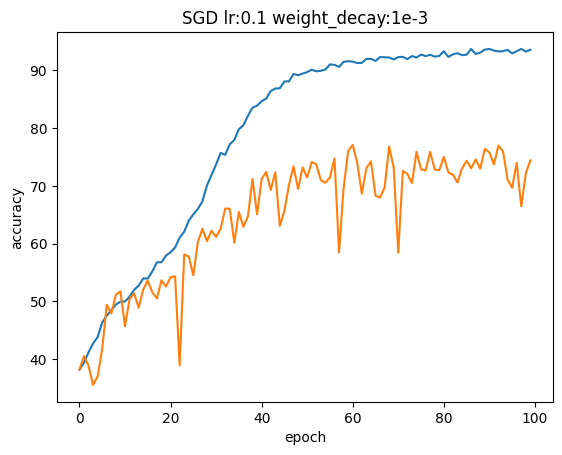

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs),list_acc[0])
plt.plot(range(num_epochs),list_acc[1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('SGD lr:0.1 weight_decay:1e-3')